In [1]:
# For Twitter API interactions:
#  install tweepy package; along the way, install wordcloud (will be used in this task)
# In terminal:
#  conda install -c conda-forge tweepy wordcloud
#
# Alternatively, right here in the notebook (uncomment the next two lines and run):
#import sys
#!conda install -c conda-forge --yes --prefix {sys.prefix} tweepy wordcloud

In [2]:
# Save "config_twitter.py" file in your working folder:
#  https://raw.githubusercontent.com/multidis/hult-social-media-analytics/main/task_twitter/config_twitter.py
#
# Collect your Twitter developer access tokens as described in the course module,
#  "Generating Twitter developer access tokens" page
#
# Edit "config_twitter.py" entering your keys/tokens in the respective assignment statements (instead of "todo").
# Then proceed with the cells below.

In [30]:
import tweepy as tw
import config_twitter

from PIL import Image
import numpy as np

In [2]:
# establish Twitter API connection
auth = tw.OAuthHandler(config_twitter.consumer_key, config_twitter.consumer_secret)
auth.set_access_token(config_twitter.access_token, config_twitter.access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [3]:
# returns False if credentials could not be verified, otherwise a user-object
# https://docs.tweepy.org/en/stable/api.html#API.verify_credentials
user = api.verify_credentials()
user

User(_api=<tweepy.api.API object at 0x000002BC05F9A070>, _json={'id': 1416139937213259776, 'id_str': '1416139937213259776', 'name': 'Cinthia Mimbela', 'screen_name': 'CinthiaMimbela', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 0, 'friends_count': 0, 'listed_count': 0, 'created_at': 'Fri Jul 16 20:57:34 +0000 2021', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 0, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': None, 'profile_background_image_url_https': None, 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1416140077940477958/TRfBzTd7_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1416140077940477958/TRfBzTd7_normal.jpg', 'profile_

In [4]:
# Collect relevant tweets through the Twitter API.
import json
import tweepy as tw

In [5]:
# IMPORTANT: enter proper access credential in config_twitter.py file
import config_twitter

In [6]:
# function to establish an initial API connection, respecting the rate limit
def connect_api_client():
    auth = tw.OAuthHandler(config_twitter.consumer_key, config_twitter.consumer_secret)
    auth.set_access_token(config_twitter.access_token, config_twitter.access_token_secret)
    # https://docs.tweepy.org/en/stable/getting_started.html#api
    api = tw.API(auth, wait_on_rate_limit=True)
    try:
        # returns False if credentials could not be verified
        # https://docs.tweepy.org/en/stable/api.html#API.verify_credentials
        api.verify_credentials()
        user = api.verify_credentials()
        if not user:
            raise("Credentials could not be verified: Please check config.py")
        print(f"Connected to Twitter API as {user.name}")
    except Exception as e:
        raise e
    return api

In [7]:
api = connect_api_client()

Connected to Twitter API as Cinthia Mimbela


In [8]:
# search query (keywords)
query = 'luxury cars OR "world-class car" OR "expensive car" -filter:retweets'
# number of tweets to query
ntweets = 2000
# search and collect relevant tweets
tweets = [tweet._json for tweet in tw.Cursor(api.search, q=query, lang="en", tweet_mode='extended').items(ntweets)]
# validating that we obtained the number of tweets asked
len(tweets)

2000

In [32]:
# example tweet content (json structure)
tweets[0]

{'created_at': 'Mon Jul 19 15:07:24 +0000 2021',
 'id': 1417139011404058633,
 'id_str': '1417139011404058633',
 'full_text': '@iamgabesanchez They are rich, they pay no taxes, they have private planes, luxury cars, mansions. \n\nYet Trumpers keep giving them money.',
 'truncated': False,
 'display_text_range': [16, 137],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'iamgabesanchez',
    'name': 'Gabe Sanchez',
    'id': 171943456,
    'id_str': '171943456',
    'indices': [0, 15]}],
  'urls': []},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 'in_reply_to_status_id': 1416929740712144898,
 'in_reply_to_status_id_str': '1416929740712144898',
 'in_reply_to_user_id': 171943456,
 'in_reply_to_user_id_str': '171943456',
 'in_reply_to_screen_name': 'iamgabesanchez',
 'user': {'id': 331671552,
  'id_str': '331671552',
  'name': 'DaveJ',
  'screen_nam

In [9]:
# save tweets data to json file
file_out = f"raw_tweet_data_{ntweets}.json"
with open(file_out, mode='w') as f:
    f.write(json.dumps(tweets, indent=2))

In [10]:
# Twitter data analysis task starter.
import html
import json
import string
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# First collect the data in json-file; specify file name here (adjust the number as queried)
fjson = 'raw_tweet_data_2000.json'

In [12]:
# read json file with tweets data
# https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files
with open(fjson) as file:
    data = json.load(file)
len(data)

2000

In [13]:
# tweet data record example: as documented for the Twitter API
# https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet
data[0]

{'created_at': 'Wed Jul 21 22:07:25 +0000 2021',
 'id': 1417969489652629505,
 'id_str': '1417969489652629505',
 'full_text': 'Multi-Purpose Hose Sprayer Nozzle\n\n$ 34.90\n\n #car #cars #autogenerationz #automotive #luxury\n\nhttps://t.co/785Hsu3C98 https://t.co/RmfUUQ3sCF',
 'truncated': False,
 'display_text_range': [0, 117],
 'entities': {'hashtags': [{'text': 'car', 'indices': [45, 49]},
   {'text': 'cars', 'indices': [50, 55]},
   {'text': 'autogenerationz', 'indices': [56, 72]},
   {'text': 'automotive', 'indices': [73, 84]},
   {'text': 'luxury', 'indices': [85, 92]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/785Hsu3C98',
    'expanded_url': 'https://autogenerationz.com/multi-purpose-hose-sprayer-nozzle/',
    'display_url': 'autogenerationz.com/multi-purpose-…',
    'indices': [94, 117]}],
  'media': [{'id': 1417969487102500866,
    'id_str': '1417969487102500866',
    'indices': [118, 141],
    'media_url': 'http://pbs.twimg.com/media/E62jvF0WYA

In [14]:
# create pandas dataframe from tweet text content
# https://stackoverflow.com/a/43175477
df_tweets = pd.DataFrame([t['full_text'] for t in data], columns=['text'])
df_tweets

,text
0,Multi-Purpose Hose Sprayer Nozzle\n\n$ 34.90\n...
1,@Seas96765207 @BTC_Archive @elonmusk First of ...
2,@wsattler119 @Sublux8tor @auto_schmidt Here's ...
3,@IssaLoop Facts could at least have some good ...
4,@zHAWKIIN_ thanks for letting me borrow the la...
...,...
1995,@JimMitchel2 @GusanoFailSon @RegisteredDem @bd...
1996,When the tree advocates wrap up their op-ed wi...
1997,@TheWarOnCars LOL nope https://t.co/te8bVlMCNk
1998,Please visit this website: \nhttps://t.co/q7V...


In [15]:
# add selected columns from tweet data fields
df_tweets['retweets'] = [t['retweet_count'] for t in data]
df_tweets['favorites'] = [t['favorite_count'] for t in data]
df_tweets['user'] = [t['user']['screen_name'] for t in data]
df_tweets

,text,retweets,favorites,user
0,Multi-Purpose Hose Sprayer Nozzle\n\n$ 34.90\n...,0,0,AutoGenerationz
1,@Seas96765207 @BTC_Archive @elonmusk First of ...,0,0,N3w0ne
2,@wsattler119 @Sublux8tor @auto_schmidt Here's ...,0,0,jonpower
3,@IssaLoop Facts could at least have some good ...,0,0,Terrell_J22
4,@zHAWKIIN_ thanks for letting me borrow the la...,0,0,xKular
...,...,...,...,...
1995,@JimMitchel2 @GusanoFailSon @RegisteredDem @bd...,0,0,89technical
1996,When the tree advocates wrap up their op-ed wi...,2,24,crschmidt
1997,@TheWarOnCars LOL nope https://t.co/te8bVlMCNk,0,3,vanshnook
1998,Please visit this website: \nhttps://t.co/q7V...,0,2,CleanerPoint


In [16]:
# text cleaning function: see prior class modules
stop_words = set(stopwords.words('english'))

# strictly speaking, this is a closure: uses a wider-scope variable stop_words
# (disregard this note if you are a Python beginner)
def text_cleanup(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [17]:
# add clean text column
# NOTE: apply in pandas applies a function to each element of the selected column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df_tweets['text_clean'] = df_tweets['text'].apply(text_cleanup)
df_tweets

,text,retweets,favorites,user,text_clean
0,Multi-Purpose Hose Sprayer Nozzle\n\n$ 34.90\n...,0,0,AutoGenerationz,hose sprayer nozzle car cars autogenerationz a...
1,@Seas96765207 @BTC_Archive @elonmusk First of ...,0,0,N3w0ne,seas96765207 elonmusk first eu depending count...
2,@wsattler119 @Sublux8tor @auto_schmidt Here's ...,0,0,jonpower,wsattler119 sublux8tor thing keep moving goalp...
3,@IssaLoop Facts could at least have some good ...,0,0,Terrell_J22,issaloop facts could least good luxury cars least
4,@zHAWKIIN_ thanks for letting me borrow the la...,0,0,xKular,thanks letting borrow lambo left outside ur 8 ...
...,...,...,...,...,...
1995,@JimMitchel2 @GusanoFailSon @RegisteredDem @bd...,0,0,89technical,jimmitchel2 gusanofailson registereddem bdrago...
1996,When the tree advocates wrap up their op-ed wi...,2,24,crschmidt,tree advocates wrap really housing strategy pu...
1997,@TheWarOnCars LOL nope https://t.co/te8bVlMCNk,0,3,vanshnook,thewaroncars lol nope
1998,Please visit this website: \nhttps://t.co/q7V...,0,2,CleanerPoint,please visit website bmw lexus 3dprint cars lo...


In [18]:
# sentiment analysis
def sentim_polarity(s):
    return TextBlob(s).sentiment.polarity

def sentim_subject(s):
    return TextBlob(s).sentiment.subjectivity

df_tweets['polarity'] = df_tweets['text_clean'].apply(sentim_polarity)
df_tweets['subjectivity'] = df_tweets['text_clean'].apply(sentim_subject)
df_tweets

,text,retweets,favorites,user,text_clean,polarity,subjectivity
0,Multi-Purpose Hose Sprayer Nozzle\n\n$ 34.90\n...,0,0,AutoGenerationz,hose sprayer nozzle car cars autogenerationz a...,0.000000,0.000000
1,@Seas96765207 @BTC_Archive @elonmusk First of ...,0,0,N3w0ne,seas96765207 elonmusk first eu depending count...,-0.040000,0.626667
2,@wsattler119 @Sublux8tor @auto_schmidt Here's ...,0,0,jonpower,wsattler119 sublux8tor thing keep moving goalp...,-0.056250,0.862500
3,@IssaLoop Facts could at least have some good ...,0,0,Terrell_J22,issaloop facts could least good luxury cars least,0.033333,0.466667
4,@zHAWKIIN_ thanks for letting me borrow the la...,0,0,xKular,thanks letting borrow lambo left outside ur 8 ...,0.066667,0.083333
...,...,...,...,...,...,...,...
1995,@JimMitchel2 @GusanoFailSon @RegisteredDem @bd...,0,0,89technical,jimmitchel2 gusanofailson registereddem bdrago...,-0.188889,0.311111
1996,When the tree advocates wrap up their op-ed wi...,2,24,crschmidt,tree advocates wrap really housing strategy pu...,0.300000,0.288889
1997,@TheWarOnCars LOL nope https://t.co/te8bVlMCNk,0,3,vanshnook,thewaroncars lol nope,0.800000,0.700000
1998,Please visit this website: \nhttps://t.co/q7V...,0,2,CleanerPoint,please visit website bmw lexus 3dprint cars lo...,0.400000,0.400000


In [19]:
# define the list of brands to analyze, consistent with the search topic
#  for which the tweets were collected
brands = ['audi', 'benz', 'bmw', 'lexus', 'volvo', 'porsche', 'tesla'] #Q4

In [20]:
# start a brand comparison dataframe
df_brands = pd.DataFrame(brands, columns=['brand'])
df_brands

,brand
0,audi
1,benz
2,bmw
3,lexus
4,volvo
5,porsche
6,tesla


In [21]:
# example: tweet subset mentioning a given brand
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
df_tweets[df_tweets['text_clean'].str.contains("volvo")]

,text,retweets,favorites,user,text_clean,polarity,subjectivity
430,Next-Gen Volvos Will Include LiDAR as Standard...,1,0,clifflocks,volvos include lidar standard offer unsupervis...,0.050000,0.050000
607,Luxury at your fingertips: Buying your next Vo...,0,0,VolvoCarsExeter,luxury fingertips buying next volvo car easy v...,0.216667,0.416667
757,The 2020 Volvo XC90 Luxury Hybrid Has It All -...,0,0,prontobody,2020 volvo xc90 luxury hybrid girl guide cars,0.000000,0.000000
844,Next-Gen Volvos Will Include LiDAR as Standard...,0,0,ICGrowth,volvos include lidar standard offer unsupervis...,0.050000,0.050000
895,@SamTwits @elonmusk Same here...\n I have alwa...,0,1,Johan__Vroonen,samtwits elonmusk always driven luxury volvo c...,0.700000,0.700000
1093,@volvocars has come a long way with the design...,0,0,ShoeshoeQhu,volvocars come long way designs cars xc90 epit...,0.225000,0.500000
1138,#luxury cars retail sales report #june2021 \n....,0,2,autotechlite,luxury cars retail sales report june2021 autot...,0.600000,0.900000
1269,"New car inventories are stunningly low, but yo...",0,2,KelleyBlueBook,new car inventories stunningly low still get d...,0.159091,0.313636
1414,"We have a luxury range of vehicles such as, SU...",0,0,CLLimoMelbourne,luxury range vehicles suvs vans modern shape v...,0.200000,0.300000
1623,"Read about how Robin Page, Volvo Cars' Head of...",1,1,volvocarcanada,read robin page volvo cars head design explain...,0.003571,0.610714


In [22]:
# function to compute average sentiment of tweets mentioning a given brand
def brand_sentiment(b):
    return df_tweets[df_tweets['text_clean'].str.contains(b)]['polarity'].mean()

In [23]:
# brand sentiment comparison
df_brands['average_sentiment'] = df_brands['brand'].apply(brand_sentiment)
df_brands

,brand,average_sentiment
0,audi,0.185950
1,benz,0.143675
2,bmw,0.196633
3,lexus,0.238294
4,volvo,0.192818
5,porsche,0.177819
6,tesla,0.125255


In [24]:
# highest sentiment tweets
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
df_tweets.sort_values(by='polarity', ascending=False).head(20) #Highest sentiment value Q5

,text,retweets,favorites,user,text_clean,polarity,subjectivity
1027,Best Luxury Cars – Luxury Adviser https://t.co...,0,0,GBAFReview,best luxury cars luxury adviser,1.00,0.30
916,Compare rates and polices [best car insurance ...,1,3,HomeAutoAgent,compare rates polices best car insurance compa...,1.00,0.30
211,@RepTroyNehls Liberal spending huh? How do you...,0,0,BravoZu70956328,reptroynehls liberal spending huh explain roll...,1.00,0.30
446,"The 5 Best, Mid-Budget &amp; Luxury Cars for B...",0,0,potentash,5 best luxury cars business professionals,1.00,0.30
858,Best Luxury Cars – Luxury Adviser https://t.co...,0,0,GBAFReview,best luxury cars luxury adviser,1.00,0.30
990,1 OF 1 Is the best for luxury cars ✨,0,1,iHanadiM,1 1 best luxury cars,1.00,0.30
343,@justonemorego In a way which the best luxury ...,0,2,Kitsuagi,justonemorego way best luxury cars understated...,1.00,0.30
503,"Parking in a row may be a nightmare. \n\nSo, i...",0,1,MatcherMotor,parking row may nightmare despise parking best...,1.00,0.30
136,"Be it for work or for pleasure, we always have...",0,0,neo_cars,work pleasure always covered excellent car opt...,1.00,1.00
1215,Best Luxury Cars – Luxury Adviser https://t.co...,0,0,GBAFReview,best luxury cars luxury adviser,1.00,0.30


In [60]:
# highest sentiment tweets
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
df_tweets.sort_values(by='polarity', ascending=True).head(20) #Lowest sentiment value Q5

,text,retweets,favorites,user,text_clean,polarity,subjectivity
490,@AshishmishraAd @INCIndia Bullshitt Wearing ai...,0,0,sathishkumarMGJ,ashishmishraad incindia bullshitt wearing airp...,-1.000000,1.000000
1148,Expect to see luxury cars in horrible accidents.,0,0,herrealegeaux,expect see luxury cars horrible accidents,-1.000000,1.000000
356,@advocatemahere What a shame when our leaders ...,0,3,Vimbai34879137,advocatemahere shame leaders buy luxury cars d...,-1.000000,1.000000
922,@MikewitthenikeS A bunch of idiots are going t...,0,2,blacknuyorican,mikewitthenikes bunch idiots going show rented...,-0.800000,0.800000
1969,hate luxury sports cars? marxism mate. https:/...,0,1,l_d1995x,hate luxury sports cars marxism mate,-0.800000,0.900000
458,@Ibra_Joudeh Why use a car made in a filthy NA...,0,0,Jzefina75244569,use car made filthy nato imperlialist country ...,-0.800000,1.000000
270,@SARIYE_18 @OsheaJacksonJr @kanyewest Who care...,0,0,techlidbull,osheajacksonjr kanyewest cares luxury cars mor...,-0.800000,1.000000
213,I miss living in California and just being stu...,0,1,damnskippie,miss living california stupid drove around ora...,-0.800000,1.000000
1466,@KgaozaN @AdvNgcukaitobi You are stupid and it...,0,0,Sicelo_702black,kgaozan advngcukaitobi stupid shows people cam...,-0.750000,0.900000
1739,Can afford luxury cars but cannot afford petro...,2,5,MKG_II_0,afford luxury cars afford petrol pathetic peop...,-0.750000,0.750000


In [25]:
# most retweeted content
df_tweets.sort_values(by='retweets', ascending=False).head(20) #Q6

,text,retweets,favorites,user,text_clean,polarity,subjectivity
413,…it’s nothing but men being haters in the comm...,2353,12177,smoke_nd_pearlz,nothing men haters comments yall really upset ...,-0.116667,0.658333
360,"Ferrari doesn't sell cars, they sell status.\n...",269,1098,NickTheEcomGod,ferrari sell cars sell status rolex sell watch...,0.000000,0.000000
1809,We’re not asking for a livable wage so we can ...,114,346,sfergs_,asking livable wage buy luxury goods mansions ...,0.375000,0.750000
406,In a culture that effectively defines wealth b...,69,240,wblau,culture effectively defines wealth much co2 em...,0.320000,0.435000
743,A society that validly celebrates beautiful ch...,67,103,julietkego,society validly celebrates beautiful churches ...,0.105556,0.555556
1291,"Hey, Catholics attached to the traditional Lat...",64,355,michaelbd,hey catholics attached traditional latin mass ...,-0.050000,0.425000
174,This brand is known for its iconic bright red ...,60,105,Tata_Crucible,brand known iconic bright red fast luxury cars...,0.280000,0.430000
422,#Rubiholics say #RahulVaidya is Poor and #Dish...,58,86,Rohan78908,rubiholics say rahulvaidya poor dishaparmar gd...,-0.450000,0.650000
468,Enugu state has a water crisis. People are dyi...,49,81,julietkego,enugu state water crisis people dying cholera ...,-0.400000,0.600000
1636,"As a boy, I thought success meant luxury cars,...",46,269,EmpireEd,boy thought success meant luxury cars big watc...,0.184091,0.138636


In [26]:
# users producing most retweeted content #Q7
df_tweets.sort_values(by='retweets', ascending=False).head(20)['user']

413     smoke_nd_pearlz
360      NickTheEcomGod
1809            sfergs_
406               wblau
743          julietkego
1291          michaelbd
174       Tata_Crucible
422          Rohan78908
468          julietkego
1636           EmpireEd
810       XaviercMiller
854             simaxis
1775         maggsnaidu
1163       LynneStactia
968           SanggitaT
237        yhdistyminen
1810         Mercomatic
1310     TheAyoOdekunle
35                  ABC
1600       AudiOfficial
Name: user, dtype: object

In [27]:
# combine all text for a specific brand
def brand_all_text(b):
    # https://stackoverflow.com/a/51871650
    return ' '.join(df_tweets[df_tweets['text_clean'].str.contains(b)]['text_clean'])

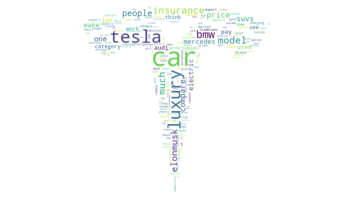

In [32]:
# most common twet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud #Q8
b = 'tesla'

mask = np.array(Image.open(r"C:\Users\CINTHIA MIMBELA\tesla.jpg"))

wc = WordCloud(mask=mask, background_color='white', width=mask.shape[1], height=mask.shape[0], max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [34]:
# for alternative visualizations, extract the keyword counts
kwords = WordCloud().process_text(brand_all_text(b))
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
# Showing the table with the top-20 keywords
df_kwords.sort_values(by='count', ascending=False).head(20)

,count
keyword,
tesla,73
car,45
luxury car,38
luxury,27
model,14
people,13
prices bmw,10
one,10
much insurance,10


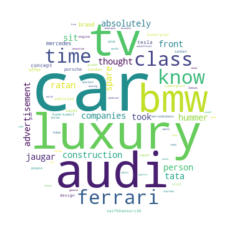

In [40]:
# most common twet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud #Q8
b = 'audi'

mask = np.array(Image.open(r"C:\Users\CINTHIA MIMBELA\mirror.jpg"))

wc = WordCloud(mask=mask, background_color='white', width=mask.shape[1], height=mask.shape[0], max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [41]:
# for alternative visualizations, extract the keyword counts
kwords = WordCloud().process_text(brand_all_text(b))
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
# Showing the table with the top-20 keywords
df_kwords.sort_values(by='count', ascending=False).head(20)

,count
keyword,
bmw audi,42
luxury class,39
car advertisement,37
front tv,37
ratan tata,37
thought luxury,37
ferrari car,37
class cars,37
sit front,37


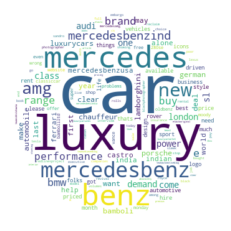

In [42]:
# most common twet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud #Q8
b = 'benz'

mask = np.array(Image.open(r"C:\Users\CINTHIA MIMBELA\mirror.jpg"))

wc = WordCloud(mask=mask, background_color='white', width=mask.shape[1], height=mask.shape[0], max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [43]:
# for alternative visualizations, extract the keyword counts
kwords = WordCloud().process_text(brand_all_text(b))
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
# Showing the table with the top-20 keywords
df_kwords.sort_values(by='count', ascending=False).head(20)

,count
keyword,
car,43
luxury car,21
luxury,20
mercedes,13
mercedesbenz,13
benz,11
new,10
mercedes benz,8
mercedesbenzind,8


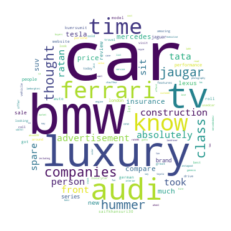

In [44]:
# most common twet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud #Q8
b = 'bmw'

mask = np.array(Image.open(r"C:\Users\CINTHIA MIMBELA\mirror.jpg"))

wc = WordCloud(mask=mask, background_color='white', width=mask.shape[1], height=mask.shape[0], max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [45]:
# for alternative visualizations, extract the keyword counts
kwords = WordCloud().process_text(brand_all_text(b))
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
# Showing the table with the top-20 keywords
df_kwords.sort_values(by='count', ascending=False).head(20)

,count
keyword,
bmw audi,42
audi ferrari,37
construction companies,37
front tv,37
sit front,37
time sit,37
spare time,37
absolutely spare,37
car absolutely,37


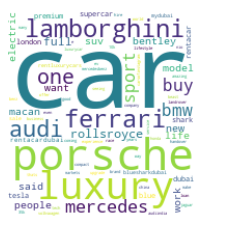

In [46]:
# most common twet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud #Q8
b = 'porsche'

mask = np.array(Image.open(r"C:\Users\CINTHIA MIMBELA\porsche.png"))

wc = WordCloud(mask=mask, background_color='white', width=mask.shape[1], height=mask.shape[0], max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [47]:
# for alternative visualizations, extract the keyword counts
kwords = WordCloud().process_text(brand_all_text(b))
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
# Showing the table with the top-20 keywords
df_kwords.sort_values(by='count', ascending=False).head(20)

,count
keyword,
porsche,35
car,29
luxury,15
luxury car,13
lamborghini,8
ferrari,8
audi,7
one,6
mercedes,6


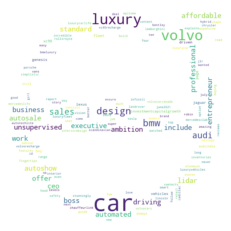

In [48]:
# most common twet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud #Q8
b = 'volvo'

mask = np.array(Image.open(r"C:\Users\CINTHIA MIMBELA\volvo.jpg"))

wc = WordCloud(mask=mask, background_color='white', width=mask.shape[1], height=mask.shape[0], max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [49]:
# for alternative visualizations, extract the keyword counts
kwords = WordCloud().process_text(brand_all_text(b))
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
# Showing the table with the top-20 keywords
df_kwords.sort_values(by='count', ascending=False).head(20)

,count
keyword,
car,13
volvo,12
luxury,12
design,4
bmw,4
audi,3
sales,3
include,2
xc90,2


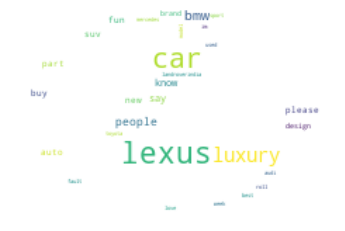

In [50]:
# most common twet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud #Q8
b = 'lexus'

mask = np.array(Image.open(r"C:\Users\CINTHIA MIMBELA\lexus.jpg"))

wc = WordCloud(mask=mask, background_color='white', width=mask.shape[1], height=mask.shape[0], max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [51]:
# for alternative visualizations, extract the keyword counts
kwords = WordCloud().process_text(brand_all_text(b))
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
# Showing the table with the top-20 keywords
df_kwords.sort_values(by='count', ascending=False).head(20)

,count
keyword,
lexus,31
car,17
luxury car,12
luxury,11
bmw,10
people,6
say,5
know,5
part,4
